# Visualizations and Insights

Directional Questions: 
1) What are the most frequently rated restaurants?
2) What is the frequency of inspection of these restaurants?
3) What is the most common violation for restaurants in NYC?
<!-- 4) What are the remediations/actions taken for certain inspection scores? -->
5) What borough has the highest scored inspection ratings on average?
6) Are certain violations more common in certain boroughs? By cuisine?
7) Are chain or independent restaurants higher rated on average?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import seaborn as sns
import numpy as np

import descartes
import geopandas as gpd
import geoplot
from shapely.geometry import Point, Polygon
import geodatasets

pd.set_option('display.max_columns', None)

# Data Upload

Upload the cleaned CSV file and convert it to a Pandas dataframe

In [2]:
# import the data
nyc_inspections_df = pd.read_csv('Cleaned_Isp.csv')

# filter for inspections performed after year 2000
nyc_inspections_df['Inspection_date'] = pd.to_datetime(nyc_inspections_df['Inspection_date'], errors='coerce')
nyc_inspections_df = nyc_inspections_df[nyc_inspections_df['Inspection_date'].dt.year > 2000]

In [3]:
# nyc_inspections_df.info()
nyc_inspections_df.head()

,Record_id,Restaurant_name,Borough,Building,Street,Zipcode,Phone,Cuisine_description,Inspection_date,Action,Violation_code,Violation_description,Critical_flag,Score,Grade,Grade_date,Inspection_type,Latitude,Longitude
0,41503108,TULCINGO RESTAURANT,Queens,40364040,NATIONAL STREET,0,7186398880,Mexican,2023-09-26,Violations were cited in the following area(s).,02B,Hot TCS food item not held at or above 140 °F.,Critical,26.0,NaN,NaN,Cycle Inspection / Initial Inspection,0.000000,0.000000
5,41611717,KIMCHI GRILL,Brooklyn,766,WASHINGTON AVENUE,11238,7183601839,Korean,2023-09-19,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,48.0,Z,2023-09-19,Cycle Inspection / Re-inspection,40.674916,-73.963217
8,50051535,PABELLON,Bronx,1501,WESTCHESTER AVENUE,10472,7183281252,Chinese,2023-06-14,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,Administrative Miscellaneous / Initial Inspection,40.828524,-73.879968
15,41395494,CITI FIELD SUITE KITCHEN,Queens,000,126TH ST & ROOSEVELT AVENUE,0,7185958100,American,2016-06-07,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,A,2016-06-07,Cycle Inspection / Initial Inspection,0.000000,0.000000
17,41304673,KEVIN'S,Brooklyn,277,VAN BRUNT AVENUE,0,7185968335,American,2019-09-27,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,Inter-Agency Task Force / Initial Inspection,0.000000,0.000000


# Visualizations and Insights

### Top 10 Cuisine Types by Number of Inspections
Please excuse the use of a pie chart

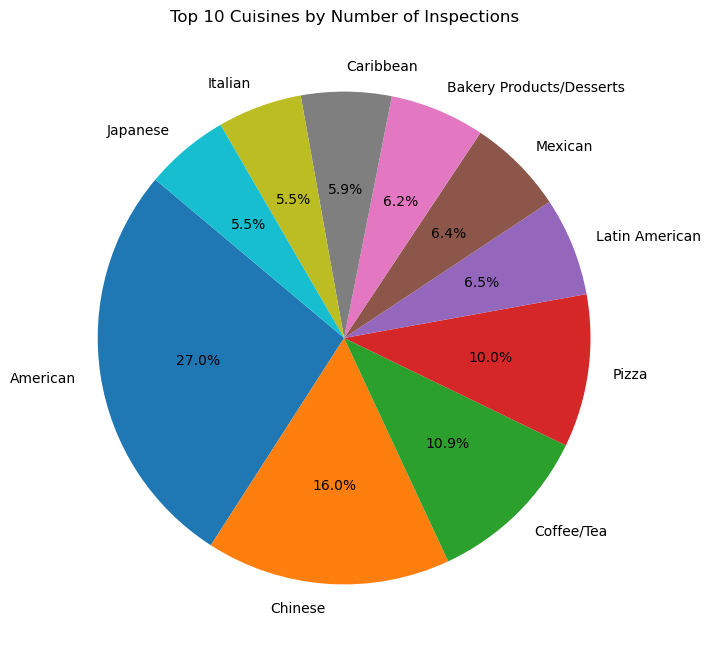

In [4]:
# Count the number of inspections for each type of cuisine
cuisine_counts = nyc_inspections_df['Cuisine_description'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(10, 8))
cuisine_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
# cuisine_counts.plot(kind='bar')

plt.title('Top 10 Cuisines by Number of Inspections')
plt.ylabel('')  # Hide the y-label

# Show the plot
plt.show()

### Frequency of Inspections Over Time

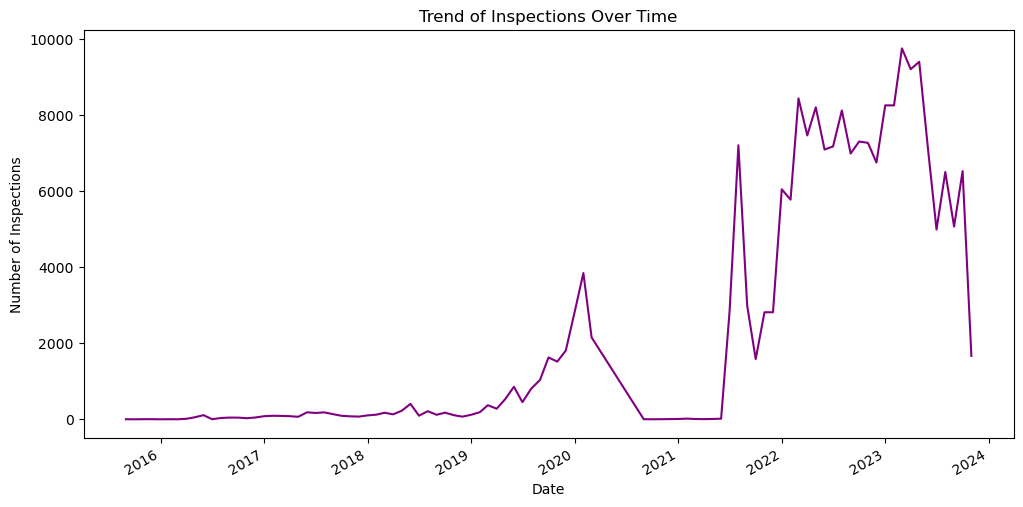

In [5]:
# Group by month and year
inspection_trend = nyc_inspections_df.groupby(nyc_inspections_df['Inspection_date'].dt.to_period("M")).size()

# Convert the PeriodIndex to DateTimeIndex
inspection_trend.index = inspection_trend.index.to_timestamp()

# Create a line plot
plt.figure(figsize=(12, 6))
inspection_trend.plot(kind='line', color='purple')
plt.title('Trend of Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
# plt.grid()

# Show the plot
plt.show()

### Top 10 Most Frequently Inspected Restaurants
#### (by Restaurant_name)

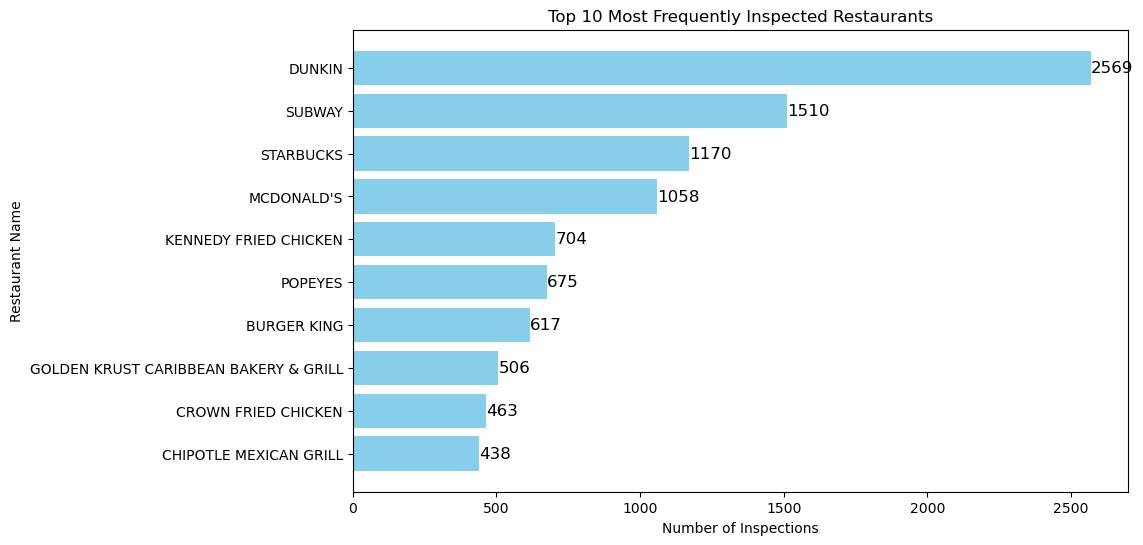

In [6]:
# Count the number of inspections per restaurant
inspection_counts = nyc_inspections_df['Restaurant_name'].value_counts().head(10)

# Create an array of positions for the bars
y_pos = np.arange(len(inspection_counts))

# Define a new color using a hex color code
bar_color = '#FFA07A'  # You can replace this with your desired hex color code

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(y_pos, inspection_counts.values, color='skyblue')
plt.yticks(y_pos, inspection_counts.index)
plt.title('Top 10 Most Frequently Inspected Restaurants')
plt.xlabel('Number of Inspections')
plt.ylabel('Restaurant Name')

# Reverse the y-axis
plt.gca().invert_yaxis()

# Adding data labels to the bars
for i, count in enumerate(inspection_counts.values):
    plt.text(count + 1, i, str(count), va='center', fontsize=12)

plt.show()

### Top 10 Most Inspected Restaurants
#### (by Record_id)

In [7]:
# Count the number of inspections per restaurant
inspection_counts = nyc_inspections_df['Record_id'].value_counts().head(10)
inspection_counts_names = pd.DataFrame(inspection_counts).reset_index()
inspection_counts_names.columns = ["Record_id", "Inspection_freq"]
inspection_counts_names
camis_names = nyc_inspections_df[['Record_id','Restaurant_name', 'Cuisine_description']]
inspection_counts_names = inspection_counts_names.merge(camis_names, on = 'Record_id')
inspection_counts_names = inspection_counts_names.groupby(['Record_id', 'Restaurant_name', 'Cuisine_description']).count()
inspection_counts_names = inspection_counts_names.reset_index()
inspection_counts_names


,Record_id,Restaurant_name,Cuisine_description,Inspection_freq
0,40365904,MEE SUM CAFE,Coffee/Tea,52
1,40398688,MASTER WOK,Chinese,65
2,40400544,THE ARCH DINER,American,48
3,41406895,SUN SAI GAI RESTAURANT,Chinese,59
4,50044250,FUJI JAPANESE CUISINE,Japanese,48
5,50045647,WU'S WONTON KING,Chinese,56
6,50079599,NICE ONE BAKERY,Bakery Products/Desserts,48
7,50089474,THE COPPOLA CAFE,Italian,47
8,50111296,BIG WONG RESTAURANT,Chinese,49
9,50114976,787 COFFEE,Mexican,47


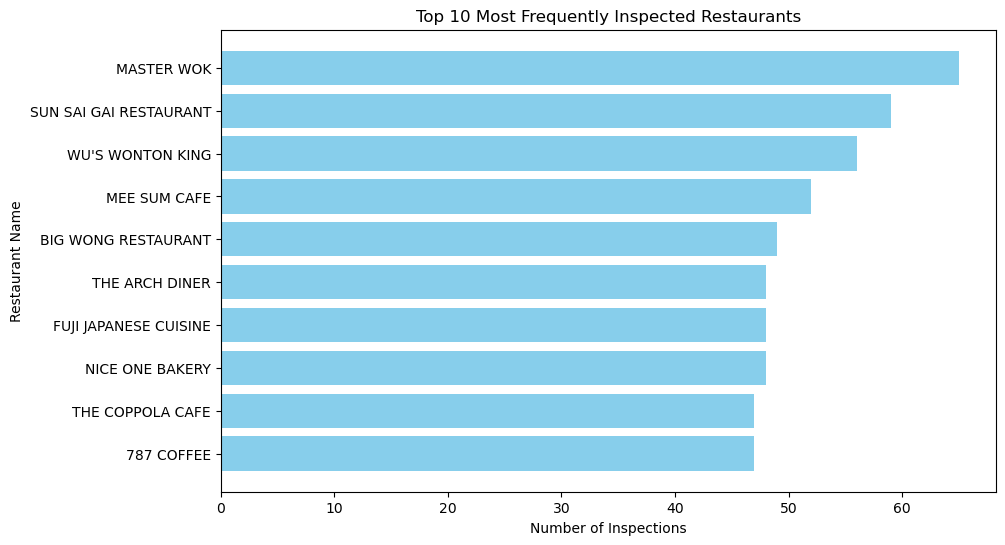

In [8]:
# Count the number of inspections per restaurant
count_by_id = inspection_counts_names[['Restaurant_name', 'Inspection_freq']].sort_values(by = 'Inspection_freq', ascending = False)

# Create an array of positions for the bars
y_pos = np.arange(len(count_by_id))

# Define a new color using a hex color code
bar_color = '#FFA07A'  # You can replace this with your desired hex color code

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(y_pos, count_by_id['Inspection_freq'], color='skyblue')
plt.yticks(y_pos, count_by_id['Restaurant_name'])
plt.title('Top 10 Most Frequently Inspected Restaurants')
plt.xlabel('Number of Inspections')
plt.ylabel('Restaurant Name')

# Reverse the y-axis
plt.gca().invert_yaxis()

# Adding data labels to the bars
# for i, count in enumerate(count_by_id['Restaurant_name']):
#     plt.text(count + 1, i, str(count), va='center', fontsize=12)

plt.show()

In [9]:
# A closer look reveals several inspections for each of these and a history of health code violations, forced closures, and reopenings
# nyc_inspections_df.loc[nyc_inspections_df["Record_id"] == 50079599]

### Distribution of Inspection Scores

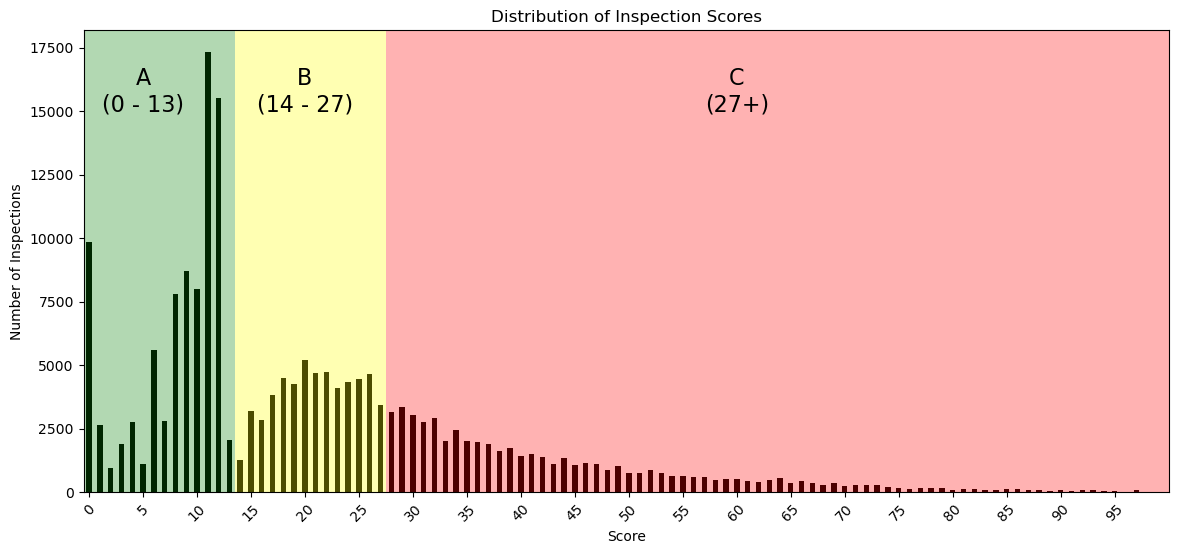

In [10]:
# Filter out NaN scores
scores = nyc_inspections_df['Score'].dropna()

# Count the number of inspections for each score
score_counts = scores.value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(14, 6))
score_counts.plot(kind='bar', color='black')

plt.title('Distribution of Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Number of Inspections')

# Set x-axis ticks and limit
x_max = 100
plt.xticks(range(0, x_max, 5), labels=range(0, x_max, 5), rotation=45)
plt.xlim(-0.5, x_max)

# Add a transparent green box between x=0 and x=13
plt.axvspan(-1, 13.5, facecolor='green', alpha=0.3)
plt.axvspan(13.5, 27.5, facecolor='yellow', alpha=0.3)
plt.axvspan(27.5, x_max, facecolor='red', alpha=0.3)

# Add a textbox with text at a specific location
textbox_y = 15000
fsize = 16

# plt.text(textbox_x, textbox_y, textbox_text, fontsize=12, color='Black', bbox=dict(facecolor='white', alpha=0))
plt.text(5, textbox_y, "A\n(0 - 13)", fontsize=fsize, color='Black', bbox=dict(facecolor='white', alpha=0), horizontalalignment='center')
plt.text(20, textbox_y, "B\n(14 - 27)", fontsize=fsize, color='Black', bbox=dict(facecolor='white', alpha=0), horizontalalignment='center')
plt.text(60, textbox_y, "C\n(27+)", fontsize=fsize, color='Black', bbox=dict(facecolor='white', alpha=0), horizontalalignment='center')

# Show the plot
plt.show()

### Number of Inspections per Borough

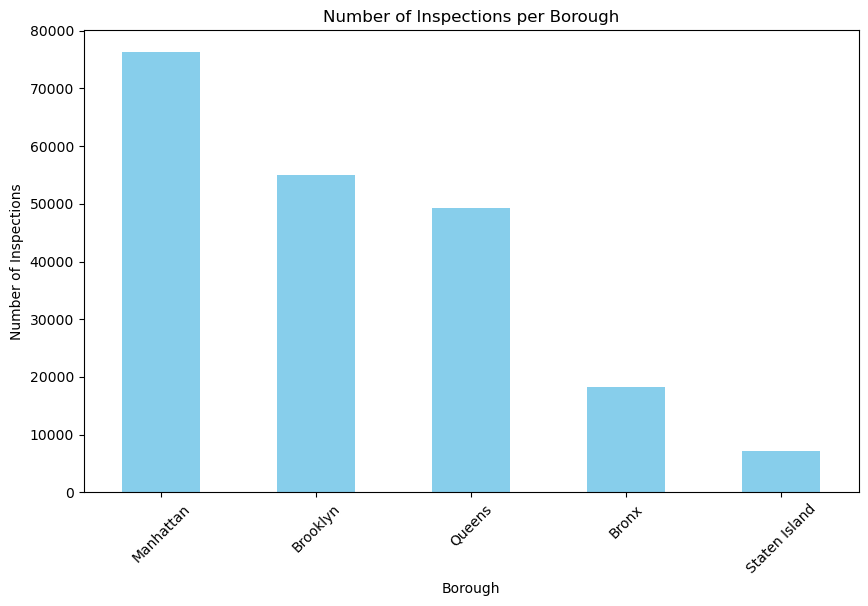

In [11]:
# USE THE RED YELLOW GREEN GRADE CHART BELOW INSTEAD OF THIS
    
# Count the number of inspections in each borough
borough_counts = nyc_inspections_df['Borough'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Inspections per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
# plt.grid(axis='y')

# Show the plot
plt.show()

### Distribution of Scores Across Each Borough

/tmp/ipykernel_649794/3974487612.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_color = plt.cm.get_cmap('Greens')(0.7)  # You can adjust the value (0.5) as needed for the desired shade
/tmp/ipykernel_649794/3974487612.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  yellow_color = plt.cm.get_cmap('YlOrRd')(0.2)  # You can adjust the value (0.2) as needed for the desired shade
/tmp/ipykernel_649794/3974487612.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  

<Figure size 1200x800 with 0 Axes>

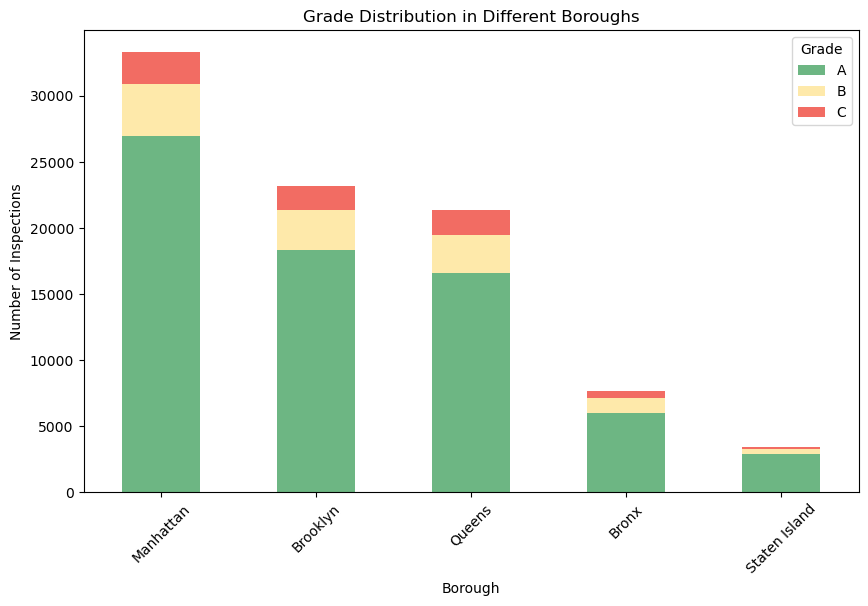

In [12]:
# Filter data to include only rows with valid grades
graded_data = nyc_inspections_df[nyc_inspections_df['Grade'].notna()]
graded_data = graded_data[graded_data['Grade'].isin(["A", "B", "C"])]

# Count the number of each grade in each borough
grade_distribution = graded_data.groupby(['Borough', 'Grade']).size().unstack()

# Calculate the total number of inspections for each borough
total_inspections = grade_distribution.sum(axis=1)

# Sort the boroughs based on the total number of inspections
sorted_boroughs = total_inspections.sort_values(ascending=False).index

# Reorder the grade_distribution DataFrame based on the sorted boroughs
grade_distribution = grade_distribution.loc[sorted_boroughs]

# Define your custom colors for A, B, and C
green_color = plt.cm.get_cmap('Greens')(0.7)  # You can adjust the value (0.5) as needed for the desired shade
yellow_color = plt.cm.get_cmap('YlOrRd')(0.2)  # You can adjust the value (0.2) as needed for the desired shade
red_color = plt.cm.get_cmap('YlOrRd')(0.7)  # You can adjust the value (0.9) as needed for the desired shade
custom_colors = [green_color, yellow_color, red_color]


# Create a custom colormap using ListedColormap
custom_cmap = mcolors.ListedColormap(custom_colors)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
grade_distribution.plot(kind='bar', stacked=True, colormap=custom_cmap, figsize=(10, 6), alpha=0.7)
# grade_distribution.plot(kind='bar', stacked=True, colormap='inferno', figsize=(10, 6))

plt.title('Grade Distribution in Different Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
# plt.grid(axis='y')

# Show the plot
plt.show()


### Average Score by Borough

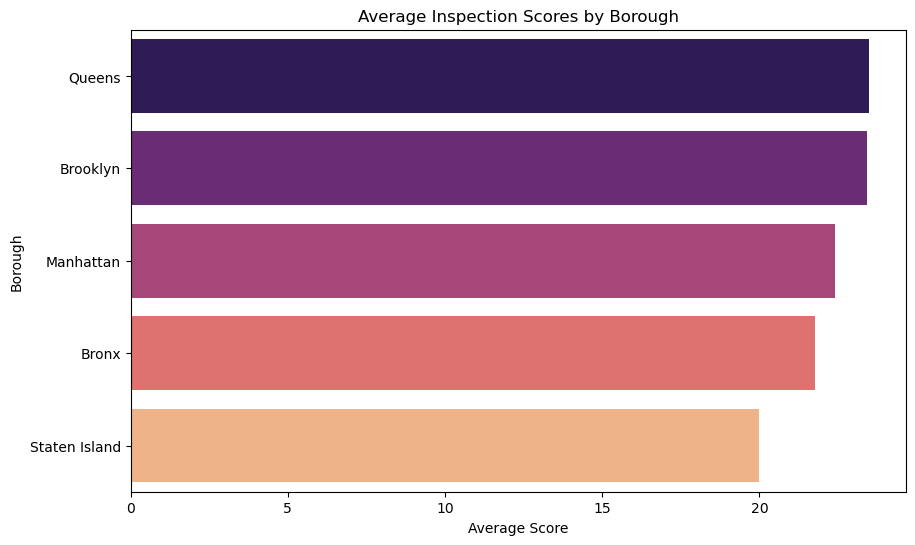

In [13]:
# Calculate the average inspection score for each borough
average_scores_by_borough = nyc_inspections_df.groupby('Borough')['Score'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
# sns.barplot(x=average_scores_by_borough.values, y=average_scores_by_borough.index, palette="magma")
sns.barplot(x=average_scores_by_borough.values, y=average_scores_by_borough.index, palette="magma")
plt.title('Average Inspection Scores by Borough')
plt.xlabel('Average Score')
plt.ylabel('Borough')
plt.show()


### Top Violation by Borough

In [14]:
# Assuming you have a DataFrame named 'nyc_inspections_df' with columns 'Borough' and 'Violation_description'

# Group by 'Borough' and find the top violation for each borough
top_violation_by_borough = nyc_inspections_df.groupby('Borough')['Violation_description'].agg(lambda x: x.value_counts().idxmax())
# top_violation_by_borough = nyc_inspections_df.groupby('Borough')['Violation_description'].agg(lambda x: x.value_counts())

# Calculate the percentage of violations that are of the top kind for each borough
percentage_of_top_violation = nyc_inspections_df.groupby('Borough')['Violation_description'].agg(lambda x: (x == x.value_counts().idxmax()).mean() * 100)

# Create a new DataFrame to display the results
table_data = pd.DataFrame({'Borough': top_violation_by_borough.index, 'Top Violation': top_violation_by_borough.values, 'Percentage of Top Violation': percentage_of_top_violation.values})

# Set the index to start from 1 (optional)
table_data.index = table_data.index + 1

# Display the table
# table_data.style.set_table_styles([{'selector': 'th', 'props': [('background-color', 'darkgreen')]}])
print(table_data.to_string())

         Borough                                                                                                                                                                                                            Top Violation  Percentage of Top Violation
1          Bronx  Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                     8.016416
2       Brooklyn  Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.                     7.907779
3      Manhattan  Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above an

### Highest and Lowest Rated Restaurant by Borough

In [15]:
bronx = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Borough"] == "Bronx"])
queens = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Borough"] == "Queens"])
manhattan = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Borough"] == "Manhattan"])
brooklyn = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Borough"] == "Brooklyn"])
staten_island = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Borough"] == "Staten Island"])


In [36]:
top_bronx = pd.DataFrame(bronx.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = True).head()).reset_index()
top_bronx

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50119321,GRAB & GO,-73.889534,40.860727,0.0
1,50054129,FORDHAM U - A CRUST & BOAR'S HEAD,-73.889534,40.860727,0.0
2,50138273,EVERYTABLE,-73.847077,40.857420,0.0
3,41586344,DIPPIN' DOTS,-73.882455,40.850537,0.0
4,50053544,KENNEDY FRIED CHICKEN,-73.910206,40.831211,0.0


In [37]:
bottom_bronx = pd.DataFrame(bronx.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = False).head()).reset_index()
bottom_bronx

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50119320,TONY'S BILLIARD AND CAFE,-73.917219,40.834343,102.000000
1,50133600,EDEMS AFRICAN RESTAURANT & LOUNGE,-73.907231,40.836520,98.000000
2,50089761,15 FLAVORS,-73.831821,40.846305,89.714286
3,50139884,RINCONSITO DEL SABOR,-73.889110,40.873931,88.909091
4,50119348,TRIPLE J'S,-73.844371,40.878227,84.000000


In [38]:
top_queens = pd.DataFrame(queens.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = True).head()).reset_index()
top_queens

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,41308412,ST JOHN'S UNIVERSITY FACULTY DINING ROOM,-73.791693,40.725593,0.0
1,50123995,QUEENS CAFE,-73.924724,40.768438,0.0
2,50123554,JOHNNY'S CAFE,-73.901524,40.715963,0.0
3,50111885,FOUR POINTS FLUSHING,-73.832711,40.764235,0.0
4,50127259,LAOCHENGDU,-73.833242,40.758502,0.0


In [39]:
bottom_queens = pd.DataFrame(queens.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = False).head()).reset_index()
bottom_queens

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50128948,DELILICIOUS KITCHEN & CAFE,-73.888771,40.701286,111.315789
1,50121966,HEAVENLY TASTE RESTAURANT,-73.782380,40.712983,98.000000
2,50143057,HANDFIELD HOUSE,-73.843540,40.672858,86.000000
3,50133019,EL MILAGRO RESTAURANT & GROCERY,-73.814993,40.755526,79.260870
4,50048053,HUSKY-P MEALS DIRECT,-73.759974,40.672370,78.120000


In [40]:
top_manhattan = pd.DataFrame(manhattan.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = True).head()).reset_index()
top_manhattan

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50044600,HOT DOG CONCESSION,-73.991944,40.750655,0.0
1,50117700,AKIN GUMP,-73.983880,40.755175,0.0
2,50044623,BAR,-73.991944,40.750655,0.0
3,50108389,MI SALSA KITCHEN,-73.988776,40.722633,0.0
4,50107938,DADO'S PIZZA,-73.951436,40.812083,0.0


In [41]:
bottom_manhattan = pd.DataFrame(manhattan.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = False).head()).reset_index()
bottom_manhattan

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50132754,LE PAIN QUOTIDIEN,-73.981943,40.779183,168.000000
1,41710976,SWEET MAMA'S SOUL FOOD,-73.936578,40.819973,117.352941
2,50121253,PLANT BLOSSOM,-73.988303,40.769478,115.000000
3,50131612,OMONIA CAFE,-73.967520,40.803020,110.315789
4,50138270,MEEM SPICY GROCERY AND DELI,-73.981747,40.742329,108.350000


In [42]:
top_brooklyn = pd.DataFrame(brooklyn.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = True).head()).reset_index()
top_brooklyn

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50137520,CAFETERIA MAESTRO,-73.958418,40.578240,0.0
1,50139274,DUNKIN DONUTS,-73.929778,40.632822,0.0
2,50129499,BK WILD,-73.962076,40.716792,0.0
3,50106962,PICK N PAY,-73.931051,40.669395,0.0
4,50130587,ST. FRANCIS COLLEGE,-73.986640,40.689984,0.0


In [43]:
bottom_brooklyn = pd.DataFrame(brooklyn.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = False).head()).reset_index()
bottom_brooklyn

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50139604,AFRA SMAK/CAFE DACHA,-73.979629,40.577038,121.000
1,50110974,The original square of soho,-73.931992,40.707679,117.000
2,50076778,PROSPECT PARK WILDLIFE CENTER,-73.964242,40.665721,117.000
3,50126782,SPRINGBONE KITCHEN,-73.988463,40.700697,91.000
4,50114979,KENNEDY FRIED CHICKEN,-73.964626,40.648832,89.625


In [44]:
top_staten = pd.DataFrame(staten_island.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = True).head()).reset_index()
top_staten

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50116419,HKS KITCHEN,-74.098783,40.594446,0.00
1,41416592,SOUTH SHORE LITTLE LEAGUE,-74.230853,40.509990,0.00
2,50018078,PHIL-AM KUSINA,-74.071264,40.612510,1.25
3,41692461,SUBWAY,-74.067752,40.591759,2.00
4,41153089,SUBWAY,-74.164113,40.560242,2.00


In [45]:
bottom_staten = pd.DataFrame(staten_island.groupby(["Record_id", "Restaurant_name", "Longitude", "Latitude"])["Score"].mean().sort_values(ascending = False).head()).reset_index()
bottom_staten

,Record_id,Restaurant_name,Longitude,Latitude,Score
0,50139779,ECLAIR LAND,-74.169053,40.582297,77.333333
1,41614438,THE WEST SHORE INN RESTAURANT,-74.186535,40.594141,72.473684
2,50110086,DADDYO'S BBQ,-74.231410,40.529521,63.318182
3,50138482,LUCKY STAR,-74.135628,40.634658,61.818182
4,50104556,REGGIANOS BRICK OVEN PIZZA CAFE,-74.241774,40.510917,60.750000


In [26]:
#88,992 total records

grade_a = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Grade"] == "A"])
grade_a.shape

# 80% of currently operational restaurants have an "A" rating

(70938, 19)

In [27]:
grade_b = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Grade"] == "B"])
grade_b.shape

# 13%  of currently operational restaurants have a "B" rating

(11370, 19)

In [28]:
grade_c = pd.DataFrame(nyc_inspections_df.loc[nyc_inspections_df["Grade"] == "C"])
grade_c.shape

# 7%  of currently operational restaurants have a "C" rating

(6684, 19)

In [29]:
score_zoom = nyc_inspections_df.loc[(nyc_inspections_df["Score"] == 11) | (nyc_inspections_df["Score"] == 12)]
score_zoom.groupby(["Inspection_type"])["Record_id"].count()

# 25,313 records received 11 and 12 scores
# Approx 32% of these are reinspection or reopening inspections
# Approx 50% of inspections are initial inspections


Inspection_type
Cycle Inspection / Compliance Inspection                      51
Cycle Inspection / Initial Inspection                      13702
Cycle Inspection / Re-inspection                            6448
Cycle Inspection / Reopening Inspection                      241
Cycle Inspection / Second Compliance Inspection                4
Inter-Agency Task Force / Initial Inspection                   6
Pre-permit (Non-operational) / Initial Inspection            160
Pre-permit (Non-operational) / Re-inspection                  16
Pre-permit (Operational) / Compliance Inspection             117
Pre-permit (Operational) / Initial Inspection               3029
Pre-permit (Operational) / Re-inspection                    1436
Pre-permit (Operational) / Reopening Inspection               89
Pre-permit (Operational) / Second Compliance Inspection       14
Name: Record_id, dtype: int64